Dataset appears to be related to healthcare appointments, potentially for predicting no-shows.

Research Question


Which demographic factors affect biases in Machine Learning prediction models for no-show in healthcare appointments?

Which techniques can be used to mitigate these biases?

In [63]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import math




In [64]:
import pandas as pd
df = pd.read_csv(r"D:\Daily file\Semester 3\Group Project\KaggleV2-May-.csv")




# General Data Overview

In [65]:
print("\nData Overview")
print("Shape of dataset:", df.shape)
print("Columns:", df.columns)
print(df.head())


Data Overview
Shape of dataset: (110527, 14)
Columns: Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No-show'],
      dtype='object')
      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.990000e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.590000e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.260000e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.680000e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.840000e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hypertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00

# Data Information and Summary

In [66]:

print("\nDataset Information")
df.info()


Dataset Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hypertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handicap        110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [67]:
print("\nSummary Statistics")
print(df.describe())


Summary Statistics
          PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474961e+14   5.675305e+06      37.088874       0.098266   
std    2.560943e+14   7.129575e+04      23.110205       0.297675   
min    3.920000e+04   5.030230e+06      -1.000000       0.000000   
25%    4.170000e+12   5.640286e+06      18.000000       0.000000   
50%    3.170000e+13   5.680573e+06      37.000000       0.000000   
75%    9.440000e+13   5.725524e+06      55.000000       0.000000   
max    1.000000e+15   5.790484e+06     115.000000       1.000000   

        Hypertension       Diabetes     Alcoholism       Handicap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000  

# Check for Missing Values


In [68]:
print("\nMissing Values Count")
print(df.isnull().sum())


Missing Values Count
PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hypertension      0
Diabetes          0
Alcoholism        0
Handicap          0
SMS_received      0
No-show           0
dtype: int64


# Unique Values and Data Types

In [69]:

for column in df.columns:
    print(f"\nUnique values in {column}: {df[column].nunique()}")
    print(df[column].unique())


Unique values in PatientId: 6100
[2.99000000e+13 5.59000000e+14 4.26000000e+12 ... 3.36537936e+10
 3.32769558e+09 9.48159186e+10]

Unique values in AppointmentID: 110527
[5642903 5642503 5642549 ... 5630692 5630323 5629448]

Unique values in Gender: 2
['F' 'M']

Unique values in ScheduledDay: 103549
['2016-04-29T18:38:08Z' '2016-04-29T16:08:27Z' '2016-04-29T16:19:04Z' ...
 '2016-04-27T16:03:52Z' '2016-04-27T15:09:23Z' '2016-04-27T13:30:56Z']

Unique values in AppointmentDay: 27
['2016-04-29T00:00:00Z' '2016-05-03T00:00:00Z' '2016-05-10T00:00:00Z'
 '2016-05-17T00:00:00Z' '2016-05-24T00:00:00Z' '2016-05-31T00:00:00Z'
 '2016-05-02T00:00:00Z' '2016-05-30T00:00:00Z' '2016-05-16T00:00:00Z'
 '2016-05-04T00:00:00Z' '2016-05-19T00:00:00Z' '2016-05-12T00:00:00Z'
 '2016-05-06T00:00:00Z' '2016-05-20T00:00:00Z' '2016-05-05T00:00:00Z'
 '2016-05-13T00:00:00Z' '2016-05-09T00:00:00Z' '2016-05-25T00:00:00Z'
 '2016-05-11T00:00:00Z' '2016-05-18T00:00:00Z' '2016-05-14T00:00:00Z'
 '2016-06-02T00:00:00Z' '2

In [70]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hypertension        int64
Diabetes            int64
Alcoholism          int64
Handicap            int64
SMS_received        int64
No-show            object
dtype: object

### convert data type

In [71]:
df["Neighbourhood"] = df["Neighbourhood"].astype("category")
df['Scholarship'] = df['Scholarship'].astype(bool)
df['Hypertension'] = df['Hypertension'].astype(bool)
df['Diabetes'] = df['Diabetes'].astype(bool)
df['Alcoholism'] = df['Alcoholism'].astype(bool)
df['Handicap'] = df['Handicap'].astype(bool)
df['SMS_received'] = df['SMS_received'].astype(bool)

df.dtypes

PatientId          float64
AppointmentID        int64
Gender              object
ScheduledDay        object
AppointmentDay      object
Age                  int64
Neighbourhood     category
Scholarship           bool
Hypertension          bool
Diabetes              bool
Alcoholism            bool
Handicap              bool
SMS_received          bool
No-show             object
dtype: object

In [72]:
df['Gender']= df['Gender'].map({'M': 1, 'F': 0})

In [73]:
# Define age bins and corresponding labels for Medium Level classification
bins = [-1, 14, 24, 44, 64, 105]
labels = ['under 15', '15-24', '25-44', '45-64', '65+']

# Apply the binning and labeling to the 'Age' column
df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Display the first few rows to check the result
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,age_group
0,2.990000e+13,5642903,0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,False,True,False,False,False,False,No,45-64
1,5.590000e+14,5642503,1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,False,False,False,False,False,False,No,45-64
2,4.260000e+12,5642549,0,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,False,False,False,False,False,False,No,45-64
3,8.680000e+11,5642828,0,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,False,False,False,False,False,False,No,under 15
4,8.840000e+12,5642494,0,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,False,True,True,False,False,False,No,45-64


# Univariate Analysis - Categorical Features



Value counts for Neighbourhood:
Neighbourhood
JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: count, Length: 81, dtype: int64


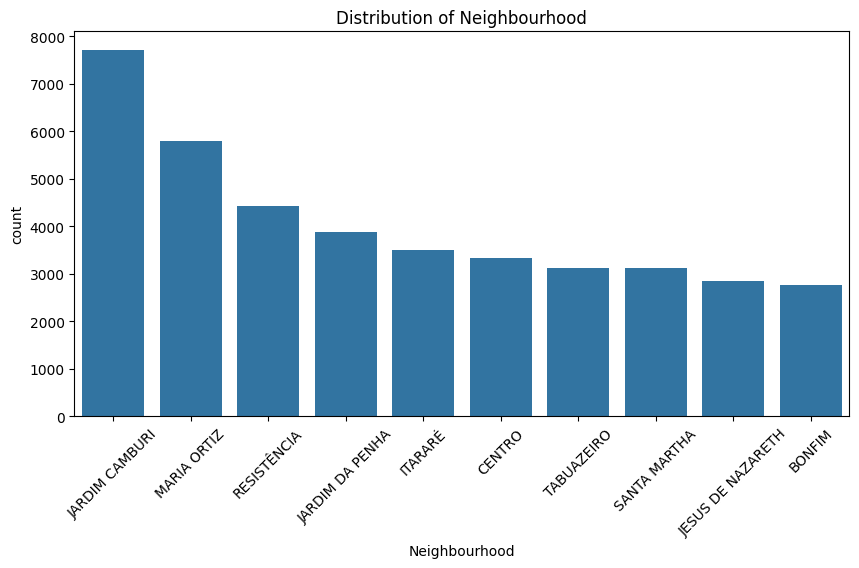


Value counts for age_group:
age_group
45-64       29992
25-44       28865
under 15    23257
65+         14397
15-24       14010
Name: count, dtype: int64


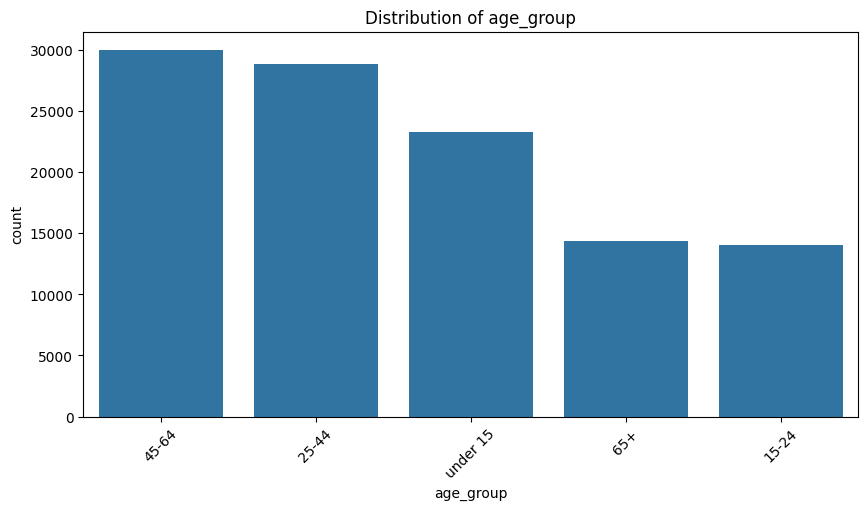

In [74]:
categorical_cols = df.select_dtypes(include=['category']).columns
for col in categorical_cols:
    # Get the value counts for the column
    value_counts = df[col].value_counts()
    print(f"\nValue counts for {col}:")
    print(value_counts)
    
    # Plot the value counts, limiting to the top 10 categories for faster plotting
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, data=df, order=value_counts.index[:10])
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show(block=False)
    plt.pause(0.1)
    plt.close()

# Univariate Analysis - Numerical Features

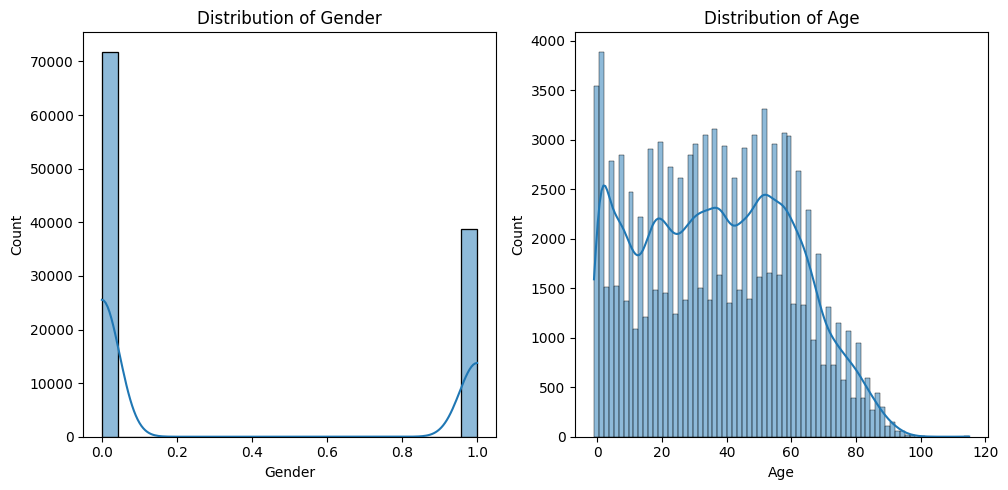

In [75]:
# Select numerical columns from the DataFrame
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# List of columns to exclude from plotting
exclude_cols = ['PatientId', 'AppointmentID']

# Filter out the columns you want to exclude
filtered_numerical_cols = [col for col in numerical_cols if col not in exclude_cols]

# Set up the figure for subplots
num_plots = len(filtered_numerical_cols)
cols = 3  # Number of columns for the subplot grid
rows = math.ceil(num_plots / cols)  # Calculate the number of rows needed

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Iterate through each filtered numerical column and plot
for i, col in enumerate(filtered_numerical_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# Bivariate Analysis - Target vs Features


Feature: Gender, Unique values: [0, 1]
Categories (2, int64): [0, 1]
Target: No-show, Unique values: ['No' 'Yes']


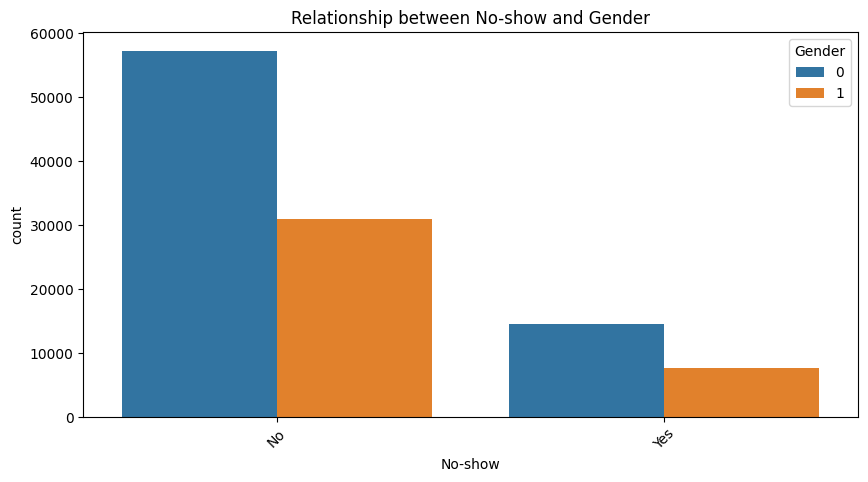

Feature: age_group, Unique values: ['45-64', 'under 15', '65+', '15-24', '25-44', NaN]
Categories (5, object): ['under 15' < '15-24' < '25-44' < '45-64' < '65+']
Target: No-show, Unique values: ['No' 'Yes']


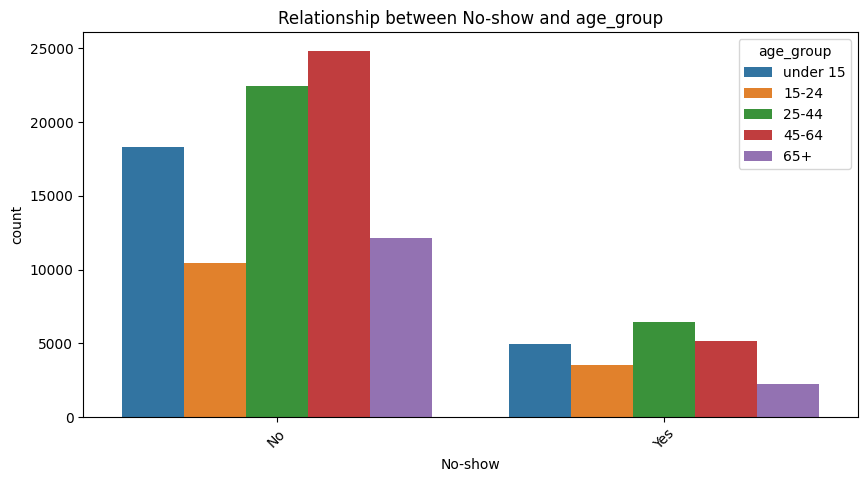

Feature: Scholarship, Unique values: [False, True]
Categories (2, bool): [False, True]
Target: No-show, Unique values: ['No' 'Yes']


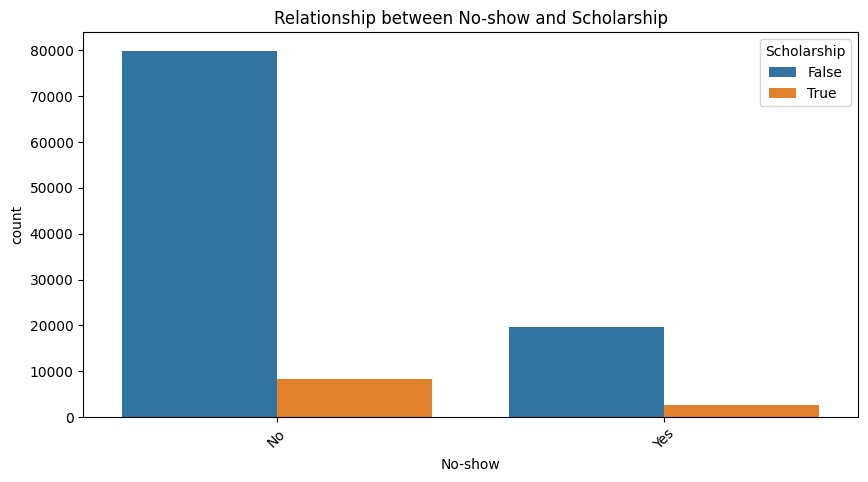

Feature: Hypertension, Unique values: [True, False]
Categories (2, bool): [False, True]
Target: No-show, Unique values: ['No' 'Yes']


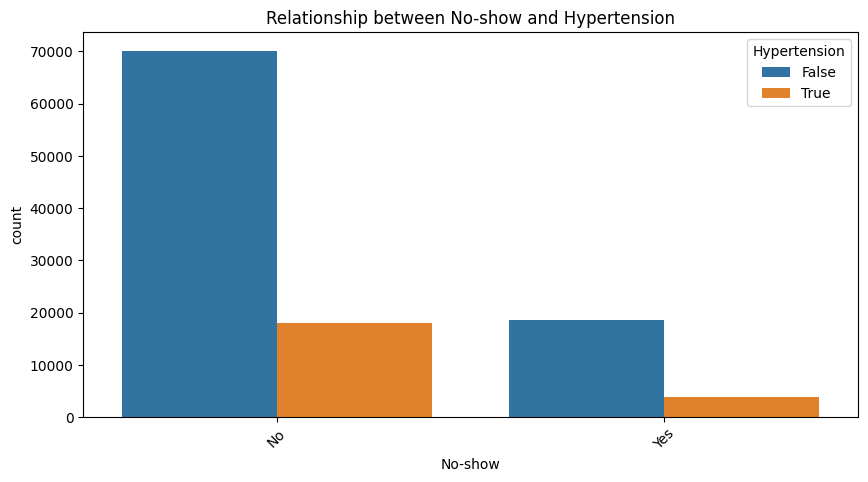

Feature: Diabetes, Unique values: [False, True]
Categories (2, bool): [False, True]
Target: No-show, Unique values: ['No' 'Yes']


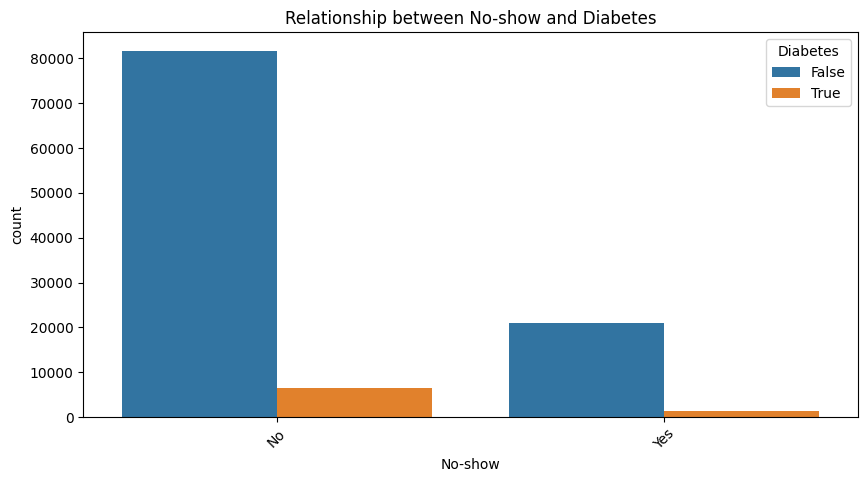

Feature: Alcoholism, Unique values: [False, True]
Categories (2, bool): [False, True]
Target: No-show, Unique values: ['No' 'Yes']


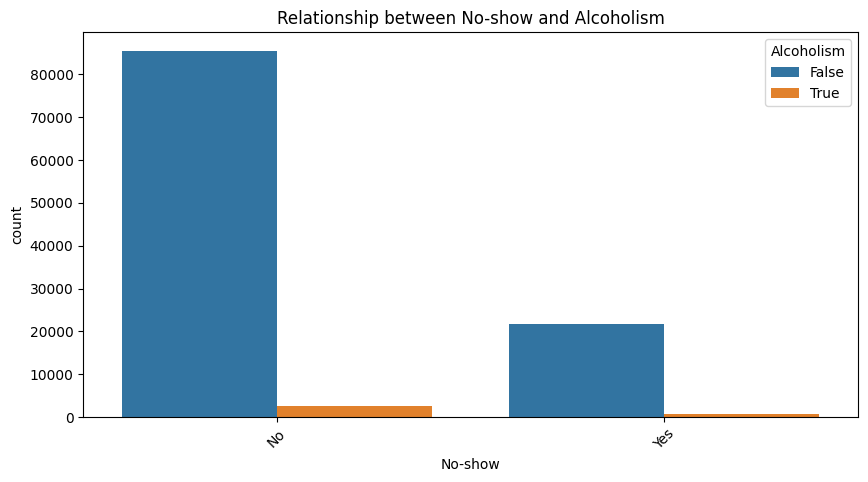

Feature: Handicap, Unique values: [False, True]
Categories (2, bool): [False, True]
Target: No-show, Unique values: ['No' 'Yes']


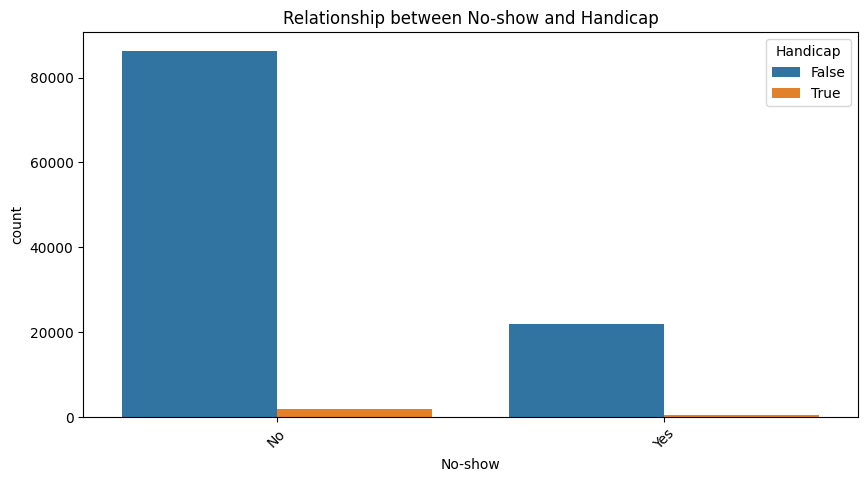

Feature: SMS_received, Unique values: [False, True]
Categories (2, bool): [False, True]
Target: No-show, Unique values: ['No' 'Yes']


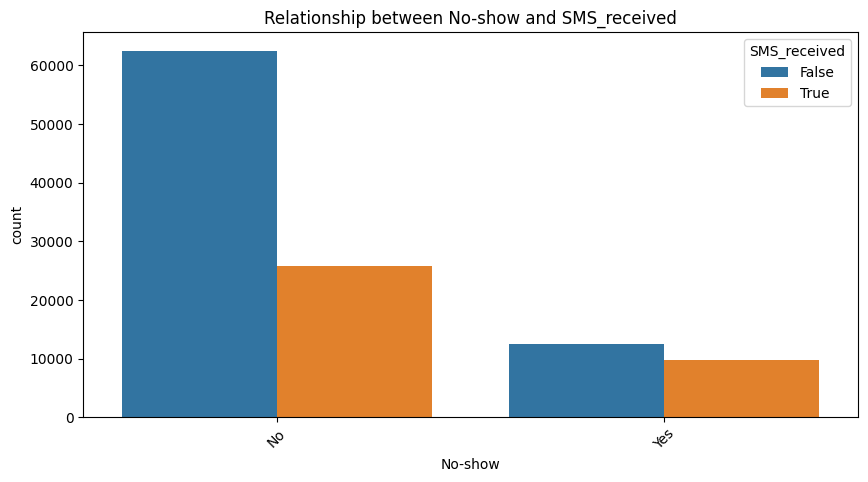

In [76]:
if 'No-show' in df.columns:
    target = 'No-show'
    features = ['Gender', 'age_group', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received']

    # Convert features to categorical where necessary
    for col in features:
        if col in df.columns:
            df[col] = df[col].astype('category')
    
    # Iterate through each feature
    for col in features:
        if col in df.columns:
            # Print unique values for each feature to check for issues
            print(f"Feature: {col}, Unique values: {df[col].unique()}")
            print(f"Target: {target}, Unique values: {df[target].unique()}")

            # Drop rows with NaN values in target and feature columns
            df_subset = df.dropna(subset=[target, col])

            # Proceed to plot only if data is available
            if not df_subset.empty:
                plt.figure(figsize=(10, 5))
                sns.countplot(x=target, hue=col, data=df_subset)  # Removed order to check the actual categories
                plt.title(f"Relationship between No-show and {col}")
                plt.xticks(rotation=45)
                plt.show()

In [77]:
df.dtypes

PatientId          float64
AppointmentID        int64
Gender            category
ScheduledDay        object
AppointmentDay      object
Age                  int64
Neighbourhood     category
Scholarship       category
Hypertension      category
Diabetes          category
Alcoholism        category
Handicap          category
SMS_received      category
No-show             object
age_group         category
dtype: object

In [78]:
# Define categorical columns, including 'No-show'
categorical_cols = ['Gender', 'age_group', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received']

# Label encode categorical columns
le = LabelEncoder()
for col in categorical_cols:
    if col in df.columns:
        # Only apply encoding if the column is not numeric
        if df[col].dtype == 'object' or df[col].dtype.name == 'category':
            df[col] = le.fit_transform(df[col])

# Select all numerical columns, including encoded categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'bool', 'float64']).columns

In [79]:
df.dtypes

PatientId          float64
AppointmentID        int64
Gender               int64
ScheduledDay        object
AppointmentDay      object
Age                  int64
Neighbourhood     category
Scholarship          int64
Hypertension         int64
Diabetes             int64
Alcoholism           int64
Handicap             int64
SMS_received         int64
No-show             object
age_group            int32
dtype: object

# Correlation Matrix for Numerical Features


0    0
1    0
2    0
3    0
4    0
Name: No-show, dtype: int32


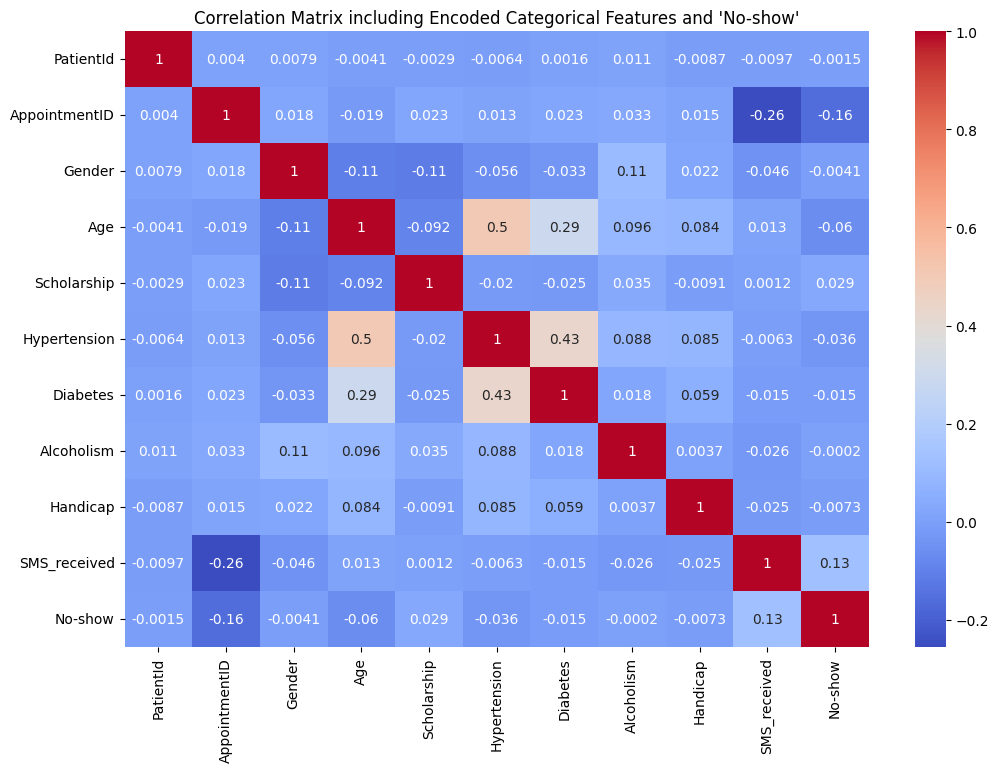

In [80]:
# Define categorical columns, including 'No-show'
categorical_cols = ['Gender', 'age_group', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No-show']

# Label encode categorical columns
le = LabelEncoder()
for col in categorical_cols:
    if col in df.columns:
        # Only apply encoding if the column is not numeric
        if df[col].dtype == 'object' or df[col].dtype.name == 'category':
            df[col] = le.fit_transform(df[col])

# Explicitly check if 'No-show' is correctly encoded
print(df['No-show'].head())  # Check first few values to verify encoding

# Select all numerical columns, including encoded categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'bool', 'float64']).columns

# Make sure 'No-show' is in the numerical columns list
if 'No-show' not in numerical_cols:
    numerical_cols = numerical_cols.append(pd.Index(['No-show']))

# Correlation Matrix for Numerical Features including encoded categorical columns and 'No-show'
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix including Encoded Categorical Features and 'No-show'")
plt.show()


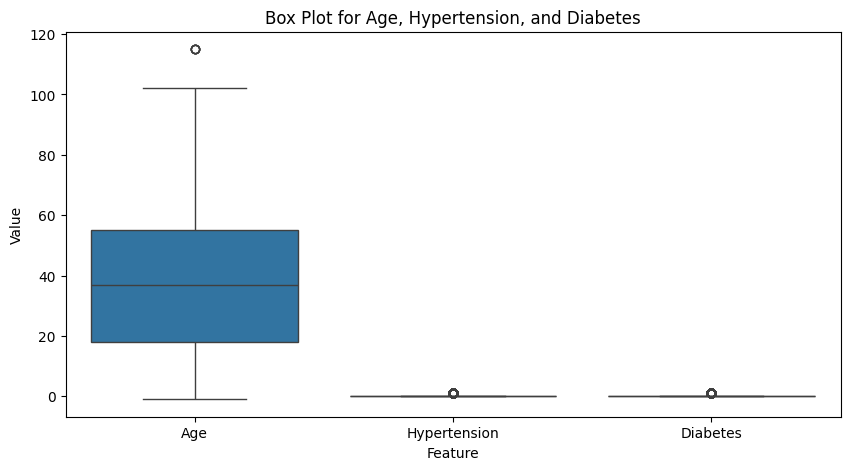

In [81]:
# Plot a combined box plot
df_melted = df[['Age', 'Hypertension', 'Diabetes']].melt(var_name='Feature', value_name='Value')
plt.figure(figsize=(10, 5))
sns.boxplot(x='Feature', y='Value', data=df_melted)
plt.title("Box Plot for Age, Hypertension, and Diabetes")
plt.show()

In [82]:
# Feature Engineering and Transformation
# Creating new features, encoding categorical variables, etc.
# Example: One-hot encoding categorical variables
if 'df' in locals() or 'df' in globals():
    X = df[['Gender', 'age_group', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received']]
else:
    raise NameError("DataFrame 'df' is not defined. Please run the previous cells to define 'df'.")
encoded_df = pd.get_dummies(X, drop_first=True)
print("\nDataset after Encoding")
print(encoded_df.head())

# Summary Insights
print("\nSummary Insights")
print("1. Description of trends seen in visualizations.")
print("2. Mention any noticeable relationships or outliers.")
print("3. Data quality issues or next steps for modeling.")


Dataset after Encoding
   Gender  age_group  Scholarship  Hypertension  Diabetes  Alcoholism  \
0       0          2            0             1         0           0   
1       1          2            0             0         0           0   
2       0          2            0             0         0           0   
3       0          4            0             0         0           0   
4       0          2            0             1         1           0   

   Handicap  SMS_received  
0         0             0  
1         0             0  
2         0             0  
3         0             0  
4         0             0  

Summary Insights
1. Description of trends seen in visualizations.
2. Mention any noticeable relationships or outliers.
3. Data quality issues or next steps for modeling.


In [83]:
X.info

<bound method DataFrame.info of         Gender  age_group  Scholarship  Hypertension  Diabetes  Alcoholism  \
0            0          2            0             1         0           0   
1            1          2            0             0         0           0   
2            0          2            0             0         0           0   
3            0          4            0             0         0           0   
4            0          2            0             1         1           0   
...        ...        ...          ...           ...       ...         ...   
110522       0          2            0             0         0           0   
110523       0          2            0             0         0           0   
110524       0          0            0             0         0           0   
110525       0          1            0             0         0           0   
110526       0          2            0             0         0           0   

        Handicap  SMS_received 

In [84]:
X = df[['Gender','age_group','Scholarship','Hypertension','Diabetes','Alcoholism','Handicap','SMS_received']]

In [85]:
# Indicate that the column is an ordered categorical feature
categ = ["under 15","15-24","25-44" "45-64" "65+"]
X["age_group"] = pd.Categorical(X["age_group"], categories=categ, ordered=True)
print(X.dtypes)

Gender             int64
age_group       category
Scholarship        int64
Hypertension       int64
Diabetes           int64
Alcoholism         int64
Handicap           int64
SMS_received       int64
dtype: object


C:\Users\drpra\AppData\Local\Temp\ipykernel_25368\160855242.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["age_group"] = pd.Categorical(X["age_group"], categories=categ, ordered=True)


In [86]:
# Get the factors and replace with numbers
labels, unique = pd.factorize(X["age_group"], sort=True)
print(labels, unique)

[-1 -1 -1 ... -1 -1 -1] CategoricalIndex([], categories=['under 15', '15-24', '25-4445-6465+'], ordered=True, dtype='category')


In [87]:
# We can replace the column with the labels
X["age_group"] = labels
X

C:\Users\drpra\AppData\Local\Temp\ipykernel_25368\2037895327.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["age_group"] = labels


,Gender,age_group,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
0,0,-1,0,1,0,0,0,0
1,1,-1,0,0,0,0,0,0
2,0,-1,0,0,0,0,0,0
3,0,-1,0,0,0,0,0,0
4,0,-1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...
110522,0,-1,0,0,0,0,0,1
110523,0,-1,0,0,0,0,0,1
110524,0,-1,0,0,0,0,0,1
110525,0,-1,0,0,0,0,0,1


In [88]:
X.info

<bound method DataFrame.info of         Gender  age_group  Scholarship  Hypertension  Diabetes  Alcoholism  \
0            0         -1            0             1         0           0   
1            1         -1            0             0         0           0   
2            0         -1            0             0         0           0   
3            0         -1            0             0         0           0   
4            0         -1            0             1         1           0   
...        ...        ...          ...           ...       ...         ...   
110522       0         -1            0             0         0           0   
110523       0         -1            0             0         0           0   
110524       0         -1            0             0         0           0   
110525       0         -1            0             0         0           0   
110526       0         -1            0             0         0           0   

        Handicap  SMS_received 

In [89]:
#If age is used as feature, following normalization process will be required.

from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
numerical_features = ['age_group']
X[numerical_features] = (min_max_scaler.fit_transform(X[numerical_features]))

C:\Users\drpra\AppData\Local\Temp\ipykernel_25368\1338757708.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numerical_features] = (min_max_scaler.fit_transform(X[numerical_features]))


### select target for model training

In [90]:
y = df['No-show']
y.shape

(110527,)

## Machine Learning Model Development

### Dataset is split into training and testing set. Several classification models will be trained on training data and its performance will be measured on testing data. After comparing the performance metrics, one classficiation model will be chosen.

Verify scikit-learn Installation

In [91]:
!pip install -U scikit-learn




[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

In [93]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
print("Imports successful")


Imports successful


In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape
X_test.shape
print(X_test.shape, X_train.shape)

(22106, 8) (88421, 8)


### Logistic Regression

In [95]:
log_reg = LogisticRegression(max_iter=1000)  # Increased max_iter to ensure convergence
log_reg.fit(X_train, y_train)

# Step 7: Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Step 8: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7993
Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     17669
           1       0.00      0.00      0.00      4437

    accuracy                           0.80     22106
   macro avg       0.40      0.50      0.44     22106
weighted avg       0.64      0.80      0.71     22106



c:\Users\drpra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\drpra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\drpra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

#import classes for training different classifciation algorithm

### Create performance metrics dataframe to store the metrics of trained models <br> A function for both training and testing is executed, so that the ML models can be trained easily

In [96]:
# Initialize an empty dataframe to store the performance metrics
performance_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

In [97]:
def evaluate_model(model_name, model, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # 'weighted' for handling imbalanced classes
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Append the results to the performance dataframe
    performance_df.loc[len(performance_df)] = [model_name, accuracy, precision, recall, f1]
    return performance_df

### Logistic Regression

In [98]:
log_reg = LogisticRegression(max_iter=1000)
evaluate_model('Logistic Regression', log_reg, X_train, X_test, y_train, y_test)

c:\Users\drpra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.799285,0.638857,0.799285,0.710123


### Decision Tree (2 variants)

In [99]:
DT_gini = DecisionTreeClassifier( criterion='gini',max_depth = 5)
evaluate_model('DT_gini', DT_gini)

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.799285,0.638857,0.799285,0.710123
1,DT_gini,0.799602,0.776521,0.799602,0.711392


In [100]:
DT_entropy = DecisionTreeClassifier( criterion='entropy', max_depth = 5)
evaluate_model('DT_entropy', DT_entropy)

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.799285,0.638857,0.799285,0.710123
1,DT_gini,0.799602,0.776521,0.799602,0.711392
2,DT_entropy,0.799602,0.776521,0.799602,0.711392


### Random Forest (2 variants)

In [101]:
RF_gini = RandomForestClassifier(n_estimators=30, criterion='gini', max_depth=5)
evaluate_model('RF_gini', RF_gini)

c:\Users\drpra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.799285,0.638857,0.799285,0.710123
1,DT_gini,0.799602,0.776521,0.799602,0.711392
2,DT_entropy,0.799602,0.776521,0.799602,0.711392
3,RF_gini,0.799285,0.638857,0.799285,0.710123


In [102]:
RF_entropy = RandomForestClassifier(n_estimators=30, criterion='entropy', max_depth=5)
evaluate_model('RF_entropy', RF_entropy)

c:\Users\drpra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.799285,0.638857,0.799285,0.710123
1,DT_gini,0.799602,0.776521,0.799602,0.711392
2,DT_entropy,0.799602,0.776521,0.799602,0.711392
3,RF_gini,0.799285,0.638857,0.799285,0.710123
4,RF_entropy,0.799285,0.638857,0.799285,0.710123


### KNN (2 variants)

In [103]:
KNN_5neighbours = KNeighborsClassifier(n_neighbors=5)
evaluate_model('KNN_5neighbours',KNN_5neighbours)

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.799285,0.638857,0.799285,0.710123
1,DT_gini,0.799602,0.776521,0.799602,0.711392
2,DT_entropy,0.799602,0.776521,0.799602,0.711392
3,RF_gini,0.799285,0.638857,0.799285,0.710123
4,RF_entropy,0.799285,0.638857,0.799285,0.710123
5,KNN_5neighbours,0.791912,0.706165,0.791912,0.718120


In [104]:
KNN_3neighbours = KNeighborsClassifier(n_neighbors=3)
evaluate_model('KNN_3neighbours',KNN_3neighbours)

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.799285,0.638857,0.799285,0.710123
1,DT_gini,0.799602,0.776521,0.799602,0.711392
2,DT_entropy,0.799602,0.776521,0.799602,0.711392
3,RF_gini,0.799285,0.638857,0.799285,0.710123
4,RF_entropy,0.799285,0.638857,0.799285,0.710123
5,KNN_5neighbours,0.791912,0.706165,0.791912,0.718120
6,KNN_3neighbours,0.721478,0.708290,0.721478,0.714509


In [105]:
# Initialize Gradient Boosting classifier
gradient_boosting = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
evaluate_model('Gradient Boosting', gradient_boosting)

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.799285,0.638857,0.799285,0.710123
1,DT_gini,0.799602,0.776521,0.799602,0.711392
2,DT_entropy,0.799602,0.776521,0.799602,0.711392
3,RF_gini,0.799285,0.638857,0.799285,0.710123
4,RF_entropy,0.799285,0.638857,0.799285,0.710123
5,KNN_5neighbours,0.791912,0.706165,0.791912,0.718120
6,KNN_3neighbours,0.721478,0.708290,0.721478,0.714509
7,Gradient Boosting,0.799602,0.780849,0.799602,0.711307


In [106]:
# Initialize Bagging classifier with Decision Trees as base estimators
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50)
evaluate_model('Bagging', bagging)

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.799285,0.638857,0.799285,0.710123
1,DT_gini,0.799602,0.776521,0.799602,0.711392
2,DT_entropy,0.799602,0.776521,0.799602,0.711392
3,RF_gini,0.799285,0.638857,0.799285,0.710123
4,RF_entropy,0.799285,0.638857,0.799285,0.710123
5,KNN_5neighbours,0.791912,0.706165,0.791912,0.718120
6,KNN_3neighbours,0.721478,0.708290,0.721478,0.714509
7,Gradient Boosting,0.799602,0.780849,0.799602,0.711307
8,Bagging,0.799602,0.780849,0.799602,0.711307


In [107]:
# Initialize AdaBoost classifier with Decision Trees as weak learners
adaboost = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, learning_rate=1.0)
evaluate_model('Adaptive Boosting', adaboost)

c:\Users\drpra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\drpra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.799285,0.638857,0.799285,0.710123
1,DT_gini,0.799602,0.776521,0.799602,0.711392
2,DT_entropy,0.799602,0.776521,0.799602,0.711392
3,RF_gini,0.799285,0.638857,0.799285,0.710123
4,RF_entropy,0.799285,0.638857,0.799285,0.710123
5,KNN_5neighbours,0.791912,0.706165,0.791912,0.718120
6,KNN_3neighbours,0.721478,0.708290,0.721478,0.714509
7,Gradient Boosting,0.799602,0.780849,0.799602,0.711307
8,Bagging,0.799602,0.780849,0.799602,0.711307
9,Adaptive Boosting,0.799285,0.638857,0.799285,0.710123


In [108]:
# Initialize a basic Multi-Layer Perceptron (Neural Network)
neural_network = MLPClassifier(hidden_layer_sizes=(100,), max_iter=200, activation='relu', solver='adam')
evaluate_model('Neural Network', neural_network)

c:\Users\drpra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.799285,0.638857,0.799285,0.710123
1,DT_gini,0.799602,0.776521,0.799602,0.711392
2,DT_entropy,0.799602,0.776521,0.799602,0.711392
3,RF_gini,0.799285,0.638857,0.799285,0.710123
4,RF_entropy,0.799285,0.638857,0.799285,0.710123
5,KNN_5neighbours,0.791912,0.706165,0.791912,0.718120
6,KNN_3neighbours,0.721478,0.708290,0.721478,0.714509
7,Gradient Boosting,0.799602,0.780849,0.799602,0.711307
8,Bagging,0.799602,0.780849,0.799602,0.711307
9,Adaptive Boosting,0.799285,0.638857,0.799285,0.710123


### Logistic regression model will be used in further bias identification process.

## Bias Identification

### 4 fairness metrics: Demographic Parity Difference, Equalized Odds Difference, Disparate Impact, Negative Rate Difference will be used. <br> These metrics will be measured for each feature to detect that this feature has bias on the logistic regression model.

### first, the required libraries for fairness metrics will be installed

In [109]:
pip install fairlearn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [110]:
pip install aif360

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [111]:
pip install aif360[inFairness]

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Import required modules

In [112]:
from fairlearn.metrics import demographic_parity_difference, equalized_odds_difference
from aif360.metrics import BinaryLabelDatasetMetric
from aif360.datasets import BinaryLabelDataset
from sklearn.metrics import accuracy_score, confusion_matrix

### Select a feature to test as demographic data and integrated into the dataframe <br> The dataframe has actual target(no-show), predicted target, and this feature as demographic.

In [113]:
demographic_data = df['Gender']

In [114]:
y_true = y
y_pred_all = log_reg.predict(X)

In [115]:
# Create a dataframe for convenience
df_results = pd.DataFrame({
    'y_true': y_true,
    'y_pred': y_pred_all,
    'demographic': demographic_data
})


In [116]:
df_results.head()

,y_true,y_pred,demographic
0,0,0,0
1,0,0,1
2,0,0,0
3,0,0,0
4,0,0,0


In [117]:
# Compute accuracy overall
accuracy = accuracy_score(df_results['y_true'], df_results['y_pred'])
print("Overall accuracy:", accuracy)

Overall accuracy: 0.798067440534892


### 2 Metrics Demographic Parity Difference, Equalized Odds Difference will be measured on that feature as follows.

In [118]:
# Fairness metrics: Demographic Parity and Equalized Odds
demographic_parity_diff = demographic_parity_difference(df_results['y_true'], df_results['y_pred'], sensitive_features=df_results['demographic'])
equalized_odds_diff = equalized_odds_difference(df_results['y_true'], df_results['y_pred'], sensitive_features=df_results['demographic'])

print(f"Demographic Parity Difference: {demographic_parity_diff}")
print(f"Equalized Odds Difference: {equalized_odds_diff}")


Demographic Parity Difference: 0.0
Equalized Odds Difference: 0.0


### Disparate Impact metrics is measured as follows.

In [119]:
# Additional bias metrics using AIF360
# Convert the dataframe to a BinaryLabelDataset object
dataset = BinaryLabelDataset(
    df=df_results,
    label_names=['y_true'],
    protected_attribute_names=['demographic']
)

# Compute metrics
metric = BinaryLabelDatasetMetric(dataset, privileged_groups=[{'demographic': 1}], unprivileged_groups=[{'demographic': 0}])

# Disparate impact
disparate_impact = metric.disparate_impact()
print(f"Disparate Impact: {disparate_impact}")

Disparate Impact: 1.017359825141811


### False Negative Rate Difference metrics is measured as follows.

In [120]:
# Calculate False Negative Rate (FNR) for privileged and unprivileged groups manually
# First, separate the privileged and unprivileged groups
privileged_group = df_results[df_results['demographic'] == 1]  # Assuming '1' represents privileged (e.g., Male)
unprivileged_group = df_results[df_results['demographic'] == 0]  # Assuming '0' represents unprivileged (e.g., Female)

# False Negative Rate (FNR) for Privileged Group
tn_priv, fp_priv, fn_priv, tp_priv = confusion_matrix(privileged_group['y_true'], privileged_group['y_pred']).ravel()
fnr_privileged = fn_priv / (fn_priv + tp_priv) if (fn_priv + tp_priv) > 0 else 0

# False Negative Rate (FNR) for Unprivileged Group
tn_unpriv, fp_unpriv, fn_unpriv, tp_unpriv = confusion_matrix(unprivileged_group['y_true'], unprivileged_group['y_pred']).ravel()
fnr_unprivileged = fn_unpriv / (fn_unpriv + tp_unpriv) if (fn_unpriv + tp_unpriv) > 0 else 0

# Difference in False Negative Rates
fnr_difference = fnr_privileged - fnr_unprivileged

print(f"False Negative Rate for Privileged Group: {fnr_privileged}")
print(f"False Negative Rate for Unprivileged Group: {fnr_unprivileged}")
print(f"False Negative Rate Difference: {fnr_difference}")

False Negative Rate for Privileged Group: 1.0
False Negative Rate for Unprivileged Group: 1.0
False Negative Rate Difference: 0.0


### According to the results of 4 metrics, the feature 'Gender' has no bias on the model

### A function is structured and executed to calculate these 4 metrics on each feature easily.

In [121]:
def calculate_bias(y_true, y_pred, demographic_data):
    df_results = pd.DataFrame({
    'y_true': y_true,
    'y_pred': y_pred_all,
    'demographic': demographic_data
    })
    accuracy = accuracy_score(df_results['y_true'], df_results['y_pred'])
    print("Overall accuracy:", accuracy)
    demographic_parity_diff = demographic_parity_difference(df_results['y_true'], df_results['y_pred'], sensitive_features=df_results['demographic'])
    equalized_odds_diff = equalized_odds_difference(df_results['y_true'], df_results['y_pred'], sensitive_features=df_results['demographic'])

    print(f"Demographic Parity Difference: {demographic_parity_diff}")
    print(f"Equalized Odds Difference: {equalized_odds_diff}")

    # Additional bias metrics using AIF360
    # Convert the dataframe to a BinaryLabelDataset object
    dataset = BinaryLabelDataset(
    df=df_results,
    label_names=['y_true'],
    protected_attribute_names=['demographic']
    )

# Compute metrics
    metric = BinaryLabelDatasetMetric(dataset, privileged_groups=[{'demographic': 1}], unprivileged_groups=[{'demographic': 0}])

# Disparate impact
    disparate_impact = metric.disparate_impact()
    print(f"Disparate Impact: {disparate_impact}")

    # Calculate False Negative Rate (FNR) for privileged and unprivileged groups manually
    # First, separate the privileged and unprivileged groups
    privileged_group = df_results[df_results['demographic'] == 1]  # Assuming '1' represents privileged (e.g., Male)
    unprivileged_group = df_results[df_results['demographic'] == 0]  # Assuming '0' represents unprivileged (e.g., Female)

    # False Negative Rate (FNR) for Privileged Group
    tn_priv, fp_priv, fn_priv, tp_priv = confusion_matrix(privileged_group['y_true'], privileged_group['y_pred']).ravel()
    fnr_privileged = fn_priv / (fn_priv + tp_priv) if (fn_priv + tp_priv) > 0 else 0

    # False Negative Rate (FNR) for Unprivileged Group
    tn_unpriv, fp_unpriv, fn_unpriv, tp_unpriv = confusion_matrix(unprivileged_group['y_true'], unprivileged_group['y_pred']).ravel()
    fnr_unprivileged = fn_unpriv / (fn_unpriv + tp_unpriv) if (fn_unpriv + tp_unpriv) > 0 else 0

    # Difference in False Negative Rates
    fnr_difference = fnr_privileged - fnr_unprivileged

    print(f"False Negative Rate for Privileged Group: {fnr_privileged}")
    print(f"False Negative Rate for Unprivileged Group: {fnr_unprivileged}")
    print(f"False Negative Rate Difference: {fnr_difference}")

### Then, all binary features are used to measure the metrics, one by one.

In [122]:
demographic_data = df['Scholarship']
calculate_bias(y_true, y_pred, demographic_data)

Overall accuracy: 0.798067440534892
Demographic Parity Difference: 0.0
Equalized Odds Difference: 0.0
Disparate Impact: 0.8344667193079657
False Negative Rate for Privileged Group: 1.0
False Negative Rate for Unprivileged Group: 1.0
False Negative Rate Difference: 0.0


In [123]:
demographic_data = df['Hypertension']
calculate_bias(y_true, y_pred, demographic_data)

Overall accuracy: 0.798067440534892
Demographic Parity Difference: 0.0
Equalized Odds Difference: 0.0
Disparate Impact: 1.2081684766204697
False Negative Rate for Privileged Group: 1.0
False Negative Rate for Unprivileged Group: 1.0
False Negative Rate Difference: 0.0


In [124]:
demographic_data = df['Diabetes']
calculate_bias(y_true, y_pred, demographic_data)

Overall accuracy: 0.798067440534892
Demographic Parity Difference: 0.0
Equalized Odds Difference: 0.0
Disparate Impact: 1.1310623489043126
False Negative Rate for Privileged Group: 1.0
False Negative Rate for Unprivileged Group: 1.0
False Negative Rate Difference: 0.0


In [125]:
demographic_data = df['Alcoholism']
calculate_bias(y_true, y_pred, demographic_data)

Overall accuracy: 0.798067440534892
Demographic Parity Difference: 0.0
Equalized Odds Difference: 0.0
Disparate Impact: 1.0022750698226222
False Negative Rate for Privileged Group: 1.0
False Negative Rate for Unprivileged Group: 1.0
False Negative Rate Difference: 0.0


In [126]:
demographic_data = df['Handicap']
calculate_bias(y_true, y_pred, demographic_data)

Overall accuracy: 0.798067440534892
Demographic Parity Difference: 0.0
Equalized Odds Difference: 0.0
Disparate Impact: 1.1141846092255194
False Negative Rate for Privileged Group: 1.0
False Negative Rate for Unprivileged Group: 1.0
False Negative Rate Difference: 0.0


In [127]:
demographic_data = df['SMS_received']
calculate_bias(y_true, y_pred, demographic_data)

Overall accuracy: 0.798067440534892
Demographic Parity Difference: 0.0
Equalized Odds Difference: 0.0
Disparate Impact: 0.6057511173317813
False Negative Rate for Privileged Group: 1.0
False Negative Rate for Unprivileged Group: 1.0
False Negative Rate Difference: 0.0


### age_group is not binary, and it is ordnial feature having 3 categories. So, some modification needs to be done to measure the metrics.

In [128]:
print("Unique age_group values:", df['age_group'].unique())


Unique age_group values: [2 4 3 0 1 5]


In [129]:
df['age_group'] = df['age_group'].replace({
    0: 'under 15', 
    1: '15-24', 
    2: '25-44', 
    3: '45-64', 
    4: '65+'
})


In [130]:
demographic_data = df['age_group']
df_results = pd.DataFrame({
    'y_true': y_true,
    'y_pred': y_pred_all,
    'demographic_age_group': demographic_data
})

In [131]:
df_results

,y_true,y_pred,demographic_age_group
0,0,0,25-44
1,0,0,25-44
2,0,0,25-44
3,0,0,65+
4,0,0,25-44
...,...,...,...
110522,0,0,25-44
110523,0,0,25-44
110524,0,0,under 15
110525,0,0,15-24


### Calculate Demographic Parity Difference, Equalized Odds Difference as follows. 

In [132]:
# Convert all demographic_age_group values to string type
df_results['demographic_age_group'] = df_results['demographic_age_group'].astype(str)


###Verify Column Consistency

In [133]:
print("Unique values in demographic_age_group:", df_results['demographic_age_group'].unique())


Unique values in demographic_age_group: ['25-44' '65+' '45-64' 'under 15' '15-24' '5']


### Calculate Demographic Parity Difference, Equalized Odds Difference as follows. 

In [134]:
accuracy = accuracy_score(df_results['y_true'], df_results['y_pred'])
print("Overall accuracy:", accuracy)
demographic_parity_diff = demographic_parity_difference(df_results['y_true'], df_results['y_pred'], sensitive_features=df_results['demographic_age_group'])
equalized_odds_diff = equalized_odds_difference(df_results['y_true'], df_results['y_pred'], sensitive_features=df_results['demographic_age_group'])

print(f"Demographic Parity Difference: {demographic_parity_diff}")
print(f"Equalized Odds Difference: {equalized_odds_diff}")

Overall accuracy: 0.798067440534892
Demographic Parity Difference: 0.0
Equalized Odds Difference: 0.0


### For Disparate Impact, age_group has to be numerical. So, ['under 15', '15-24', '25-44', '45-64', '65+']

In [135]:
print(df_results['demographic_age_group'].unique())

['25-44' '65+' '45-64' 'under 15' '15-24' '5']


In [136]:
# Indicate that the column is an ordered categorical feature
categ = ['under 15', '15-24', '25-44', '45-64', '65+']
df_results['demographic_age_group'] = pd.Categorical(df_results['demographic_age_group'], categories=categ, ordered=True)
print(df_results.dtypes)

y_true                      int32
y_pred                      int32
demographic_age_group    category
dtype: object


In [137]:
labels, unique = pd.factorize(df_results["demographic_age_group"], sort=True)
print(labels, unique)

[2 2 2 ... 0 1 2] CategoricalIndex(['under 15', '15-24', '25-44', '45-64', '65+'], categories=['under 15', '15-24', '25-44', '45-64', '65+'], ordered=True, dtype='category')


In [138]:
df_results["demographic_age_group"] = labels
df_results

,y_true,y_pred,demographic_age_group
0,0,0,2
1,0,0,2
2,0,0,2
3,0,0,4
4,0,0,2
...,...,...,...
110522,0,0,2
110523,0,0,2
110524,0,0,0
110525,0,0,1


In [139]:
df_results.isnull().sum()

y_true                   0
y_pred                   0
demographic_age_group    0
dtype: int64

### To measure the Disparate Impact and False Negative Rate Difference, it has to be 2 categories. So, 3 categories of age_group are transformed into 2 categories only: privilieged group and unprivileged group. Then, the metrics are measured.

In [140]:
# Convert the dataframe to a BinaryLabelDataset object
dataset = BinaryLabelDataset(
    df=df_results,
    label_names=['y_true'],  # Ensure 'y_true' is the correct label name in your DataFrame
    protected_attribute_names=['demographic_age_group']  # Ensure this is a list
)

# Print unique values of age_group for verification
print("Unique age_group values:", df_results['demographic_age_group'].unique())

# Define privileged and unprivileged groups
privileged_groups = [{'demographic_age_group': 0}]  # Change based on your understanding of the data
unprivileged_groups = [{'demographic_age_group': 1 }, {'demographic_age_group': 2}]  # Include all relevant unprivileged groups

# Compute metrics
metric = BinaryLabelDatasetMetric(dataset, privileged_groups=privileged_groups, unprivileged_groups=unprivileged_groups)

# Calculate disparate impact
disparate_impact = metric.disparate_impact()

print(f"Disparate Impact: {disparate_impact}")

Unique age_group values: [ 2  4  3  0  1 -1]
Disparate Impact: 0.7813450756688934


In [141]:
# False Negative Rate (FNR) for Privileged Group
tn_priv, fp_priv, fn_priv, tp_priv = confusion_matrix(privileged_group['y_true'], privileged_group['y_pred']).ravel()
fnr_privileged = fn_priv / (fn_priv + tp_priv) if (fn_priv + tp_priv) > 0 else 0

# False Negative Rate (FNR) for Unprivileged Group
tn_unpriv, fp_unpriv, fn_unpriv, tp_unpriv = confusion_matrix(unprivileged_group['y_true'], unprivileged_group['y_pred']).ravel()
fnr_unprivileged = fn_unpriv / (fn_unpriv + tp_unpriv) if (fn_unpriv + tp_unpriv) > 0 else 0

# Difference in False Negative Rates
fnr_difference = fnr_privileged - fnr_unprivileged
print(f"False Negative Rate for Privileged Group: {fnr_privileged}")
print(f"False Negative Rate for Unprivileged Group: {fnr_unprivileged}")
print(f"False Negative Rate Difference: {fnr_difference}")

False Negative Rate for Privileged Group: 1.0
False Negative Rate for Unprivileged Group: 1.0
False Negative Rate Difference: 0.0


### SHAP visualization is done to know the impact of each feature on the model.(It is optional)

In [142]:
import shap

c:\Users\drpra\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [143]:
# Create a SHAP explainer for linear models
explainer = shap.LinearExplainer(log_reg, X_train)  # For linear models

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)

In [144]:
shap_values.shape

(22106, 8)

In [145]:
feat_names=list(X.columns)

In [146]:
feat_names

['Gender',
 'age_group',
 'Scholarship',
 'Hypertension',
 'Diabetes',
 'Alcoholism',
 'Handicap',
 'SMS_received']

In [147]:
X_train = np.array(X_train, dtype=np.float64)
X_test = np.array(X_test, dtype=np.float64)

# Create SHAP explainer for linear models
explainer = shap.LinearExplainer(log_reg, X_train)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)

### Visulization 

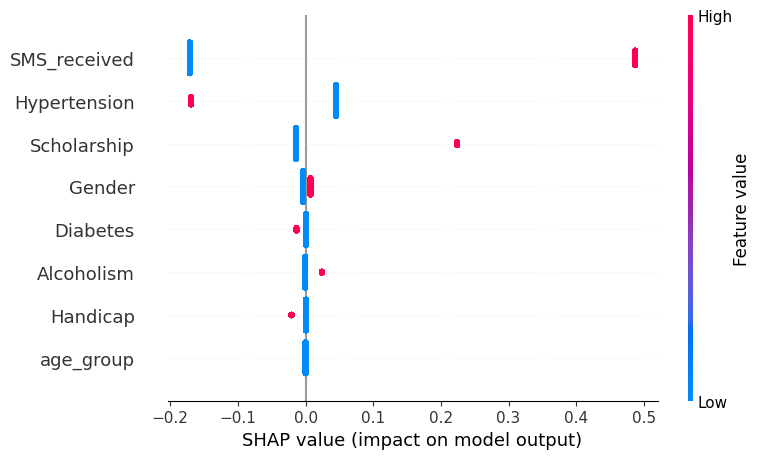

In [148]:
shap.summary_plot(shap_values, X_test, feature_names=feat_names)

This SHAP summary plot shows the impact of features on the model’s predictions:

Y-axis: Lists features, ordered by their overall impact.
X-axis (SHAP values): Indicates impact direction; positive values increase predictions, negative values decrease them.
Color: Represents feature values (red = high, blue = low).
Key insights:

SMS_received: Lower values reduce predictions.
Scholarship: Higher values increase predictions.
Gender, Alcoholism, Handicap: Vary in impact, depending on value.